## K-Nearest Neighbors lab

#### Data Description

The data used was cleaned. Check the EDA notebook for more details.

Data preprocessing has been done below before the training.

### Notebook Description

This notebook will cover the **K-Nearest Neighbors** Classification Model.

For this usecase, we will be using the 'current_value' column to predict which value category the player falls under:
1. Low value
2. Medium value
3. Elite

## Import Libraries

In [114]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Load the Data

In [115]:
df = pd.read_csv("final_data_cleaned.csv")

In [116]:
df.shape

(6397, 19)

In [117]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,8,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,10,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


## Preprocess the Data

In [118]:
# creating a list containing the categorical columns names only
cetegorical_feats = df.select_dtypes(include='object').columns.to_list()

In [119]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Cardiff City         26
Portimonense SC      26
Watford FC           26
                     ..
Bayern Munich         2
Gaziantep FK          2
Manchester City       2
FC Barcelona          2
Real Madrid           1
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          667
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Defender                         1
Attack                           1
Name: count, dtype: int64


In [120]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [121]:
# Calculate the frequency of each 'Type'
type_counts = df['position'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['position'].isin(type_counts[type_counts >= 2].index)]

In [122]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Watford FC           26
Blackpool FC         26
Portimonense SC      26
                     ..
Arsenal FC            4
Gaziantep FK          2
Bayern Munich         2
Manchester City       2
FC Barcelona          2
Name: count, Length: 373, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          666
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Name: count, dtype: int64


In [123]:
df.columns

Index(['Unnamed: 0', 'team', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [124]:
# removing the unnamed column
df.drop(columns='Unnamed: 0', inplace=True)

In [125]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [126]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


In [127]:
cetegorical_feats

['team', 'position']

In [128]:
df.shape

(6394, 18)

In [129]:
df.drop(columns=['team'], inplace=True)

In [130]:
# one hot encoding the categorical features
df = pd.get_dummies(df, columns=['position'], drop_first=True)

In [131]:
df.shape

(6394, 29)

In [132]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [133]:
# creating the correlation matrix
correlation = df.corr(numeric_only=True)

In [134]:
# printing the correlations for the column ''current_value'
print(correlation['current_value'].sort_values(ascending=False))

current_value                          1.000000
highest_value                          0.866758
appearance                             0.408822
minutes played                         0.408235
assists                                0.150763
award                                  0.138032
games_injured                          0.130906
goals                                  0.115595
days_injured                           0.115410
height                                 0.075188
position_midfield-CentralMidfield      0.035996
position_Attack-LeftWinger             0.031886
position_midfield-AttackingMidfield    0.023774
position_midfield-DefensiveMidfield    0.010386
position_Defender Centre-Back          0.002336
position_Attack-SecondStriker          0.001120
position_Attack-RightWinger           -0.001915
second yellow cards                   -0.006926
yellow cards                          -0.010212
position_midfield                     -0.011039
position_Defender Right-Back          -0

In [135]:
# Set the correlation threshold
threshold = 0.11  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index.to_list()
selected_features

['age',
 'appearance',
 'goals',
 'assists',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value']

In [136]:
selected_features.remove('days_injured')
selected_features

['age',
 'appearance',
 'goals',
 'assists',
 'minutes played',
 'games_injured',
 'award',
 'current_value',
 'highest_value']

In [137]:
df = df[selected_features]
# df.drop(columns=['minutes played', 'days_injured'], inplace=True)
df.head()

,age,appearance,goals,assists,minutes played,games_injured,award,current_value,highest_value
0,21.0,34.0,0.000000,0.000000,2758.0,13.0,0.0,2000000.0,2000000.0
1,23.0,89.0,0.012619,0.063096,7132.0,15.0,3.0,22000000.0,22000000.0
2,22.0,34.0,0.000000,0.033507,2686.0,28.0,1.0,10000000.0,12000000.0
3,24.0,72.0,0.032293,0.048439,5574.0,49.0,3.0,35000000.0,35000000.0
4,25.0,60.0,0.000000,0.018817,4783.0,20.0,1.0,22000000.0,40000000.0


In [138]:
# Calculate the 35th and 75th percentiles of the currect values
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_value(value):
    if value < p35:
        return 'Low Value'
    elif value < p75:
        return 'Medium Value'
    else:
        return 'Elite'

# Apply the function to create a new column
df['current_value_categories'] = df['current_value'].apply(categorize_value)

# Verify the distribution of the new categories
print(df['current_value_categories'].value_counts())

current_value_categories
Medium Value    2692
Low Value       1981
Elite           1721
Name: count, dtype: int64


In [139]:
# encoding the target
encoder = LabelEncoder()
df['current_value_categories'] = encoder.fit_transform(df['current_value_categories'])  

#### 4. Prepare train and test data

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
# splitting the data into features and target variable
# X = features
# y = target
# we'll drop the 'current_value' and 'current_value_categories' columns from the test data 
# and use the transformed 'current_value_categories' column for the target
X = df.drop(columns=['current_value_categories', 'current_value'])
y = df['current_value_categories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Buliding the Model

In [142]:
# Build the KNN model

model = KNeighborsClassifier()

In [143]:
# parameters to be passed to the Grid Search model
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7]
}

# building a Grid Search model to find the best parameters
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

 ### K Nearest Neighbors

In [144]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]}, scoring='f1_macro',
             verbose=1)

In [145]:
# building a model with the best parameters the grid search found
model = grid_search.best_estimator_

## Test the Model

In [146]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [147]:
# Make predictions on the train set to check overtfitting and underfitting
y_pred_train = model.predict(X_train_scaled)

## Evaluating the Model 

- Benchmark

In [148]:
# our benchmark model (base model)
base_model = round(df['current_value_categories'].value_counts()[1]/df.shape[0]*100, 2)
base_model

30.98

- Accuracy
- Precision
- Recall
- F1 Score

In [149]:
# Evaluate the model

print('Training Metrics:\n-----------------')

# Calculate train Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy:  {train_accuracy*100:.2f}")

# Calculate train Precision
train_precision = precision_score(y_train, y_pred_train, average='macro')
print(f"Training Precision: {train_precision*100:.2f}")

# Calculate train Recall
train_recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Training Recall:    {train_recall*100:.2f}")

# Calculate train F1 Score
train_f1 = f1_score(y_train, y_pred_train, average='macro')
print(f"Training F1 Score:  {train_f1*100:.2f}")

print('\nTesting Metrics:\n-----------------')

# Calculate Test Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy:   {accuracy*100:.2f}")

# Calculate Test Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Test Precision:  {precision*100:.2f}")

# Calculate Test Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Test Recall:     {recall*100:.2f}")

# Calculate Test F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 Score:   {f1*100:.2f}")

Training Metrics:
-----------------
Training Accuracy:  76.07
Training Precision: 77.16
Training Recall:    77.31
Training F1 Score:  77.07

Testing Metrics:
-----------------
Test Accuracy:   63.64
Test Precision:  65.19
Test Recall:     65.41
Test F1 Score:   65.12


Confusion Matrix

In [150]:
# the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[278,   4,  76],
       [  3, 250, 128],
       [ 61, 193, 286]], dtype=int64)

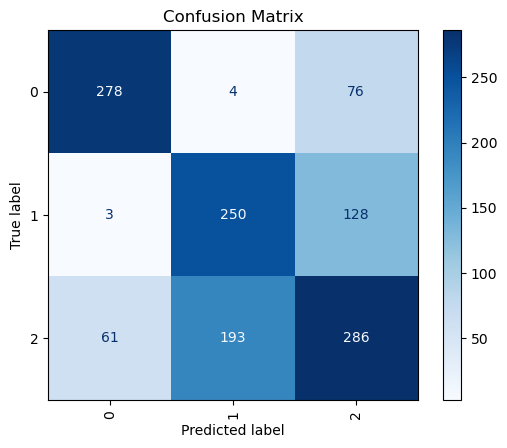

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()